In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Quick Overview

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [4]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [5]:
train.drop(train.index[:200], inplace=True)
train.drop(train.index[-450:], inplace=True)

In [6]:
train

,id,date,country,store,product,num_sold
200,200,2017-01-03,Japan,Kaggle Store,Using LLMs to Improve Your Coding,191
201,201,2017-01-03,Japan,Kaggle Store,Using LLMs to Train More LLMs,176
202,202,2017-01-03,Japan,Kaggle Store,Using LLMs to Win Friends and Influence People,31
203,203,2017-01-03,Japan,Kaggle Store,Using LLMs to Win More Kaggle Competitions,164
204,204,2017-01-03,Japan,Kaggle Store,Using LLMs to Write Better,150
...,...,...,...,...,...,...
136495,136495,2021-12-25,Spain,Kagglazon,Using LLMs to Improve Your Coding,548
136496,136496,2021-12-25,Spain,Kagglazon,Using LLMs to Train More LLMs,530
136497,136497,2021-12-25,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,77
136498,136498,2021-12-25,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,448


In [7]:
test.head()

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [8]:
test.index = test['id']
test.drop('id', axis=1, inplace=True)

In [9]:
print(f'Shape of Train dataframe: {train.shape}\nShape of Test dataframe: {test.shape}')

Shape of Train dataframe: (136300, 6)
Shape of Test dataframe: (27375, 4)


In [10]:
# Num sold is the target
print(f'Columns: {train.columns}')

Columns: Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')


#### Even amount of all products

In [11]:
train['product'].value_counts()

Using LLMs to Improve Your Coding                 27260
Using LLMs to Train More LLMs                     27260
Using LLMs to Win Friends and Influence People    27260
Using LLMs to Win More Kaggle Competitions        27260
Using LLMs to Write Better                        27260
Name: product, dtype: int64

In [12]:
test['product'].value_counts()

Using LLMs to Improve Your Coding                 5475
Using LLMs to Train More LLMs                     5475
Using LLMs to Win Friends and Influence People    5475
Using LLMs to Win More Kaggle Competitions        5475
Using LLMs to Write Better                        5475
Name: product, dtype: int64

## Making dummy variables

In [13]:
dummy_train = pd.get_dummies(train[['country', 'store', 'product']])
dummy_test = pd.get_dummies(test[['country', 'store', 'product']])

In [14]:
dummy_train

,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
200,0,0,0,1,0,0,0,1,1,0,0,0,0
201,0,0,0,1,0,0,0,1,0,1,0,0,0
202,0,0,0,1,0,0,0,1,0,0,1,0,0
203,0,0,0,1,0,0,0,1,0,0,0,1,0
204,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136495,0,0,0,0,1,1,0,0,1,0,0,0,0
136496,0,0,0,0,1,1,0,0,0,1,0,0,0
136497,0,0,0,0,1,1,0,0,0,0,1,0,0
136498,0,0,0,0,1,1,0,0,0,0,0,1,0


In [15]:
dummy_train['month'] = train['date'].dt.month
#dummy_train['day'] = train_cleaned['date'].dt.day

dummy_test['month'] = test['date'].dt.month
#dummy_train['day'] = train_cleaned['date'].dt.day

In [16]:
dummy_train = pd.concat([train[['num_sold']], dummy_train], axis=1)

In [17]:
dummy_train

,num_sold,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better,month
200,191,0,0,0,1,0,0,0,1,1,0,0,0,0,1
201,176,0,0,0,1,0,0,0,1,0,1,0,0,0,1
202,31,0,0,0,1,0,0,0,1,0,0,1,0,0,1
203,164,0,0,0,1,0,0,0,1,0,0,0,1,0,1
204,150,0,0,0,1,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136495,548,0,0,0,0,1,1,0,0,1,0,0,0,0,12
136496,530,0,0,0,0,1,1,0,0,0,1,0,0,0,12
136497,77,0,0,0,0,1,1,0,0,0,0,1,0,0,12
136498,448,0,0,0,0,1,1,0,0,0,0,0,1,0,12


In [18]:
dummy_test

,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better,month
id,,,,,,,,,,,,,,
136950,1,0,0,0,0,0,1,0,1,0,0,0,0,1
136951,1,0,0,0,0,0,1,0,0,1,0,0,0,1
136952,1,0,0,0,0,0,1,0,0,0,1,0,0,1
136953,1,0,0,0,0,0,1,0,0,0,0,1,0,1
136954,1,0,0,0,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164320,0,0,0,0,1,1,0,0,1,0,0,0,0,12
164321,0,0,0,0,1,1,0,0,0,1,0,0,0,12
164322,0,0,0,0,1,1,0,0,0,0,1,0,0,12


## Removing Outliers

<Axes: >

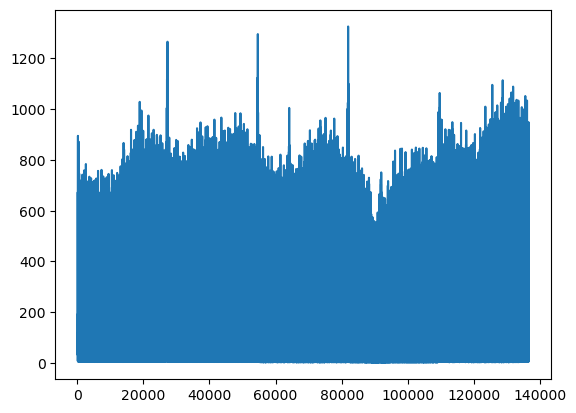

In [19]:
train['num_sold'].plot()

In [61]:
import statsmodels.api as sm

# Select the columns for decomposition
columns_for_decomposition = ['num_sold']

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(dummy_train[columns_for_decomposition], model='additive', period=15000)

# Access the decomposed components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid



# decomposition = sm.tsa.seasonal_decompose(train['num_sold', 'month'], model='additive', period=12)

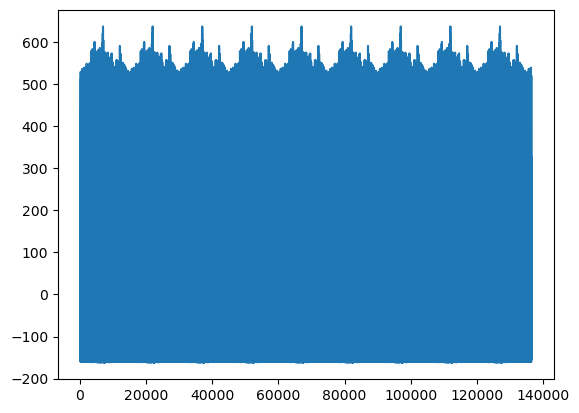

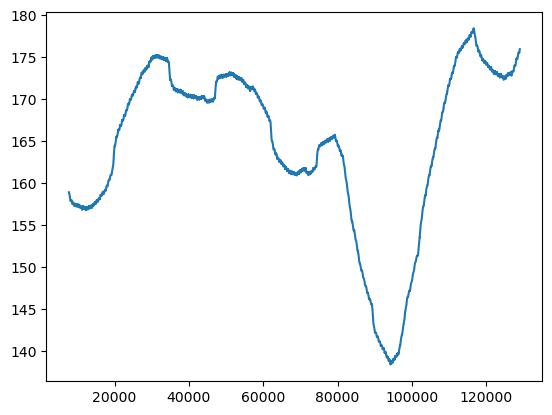

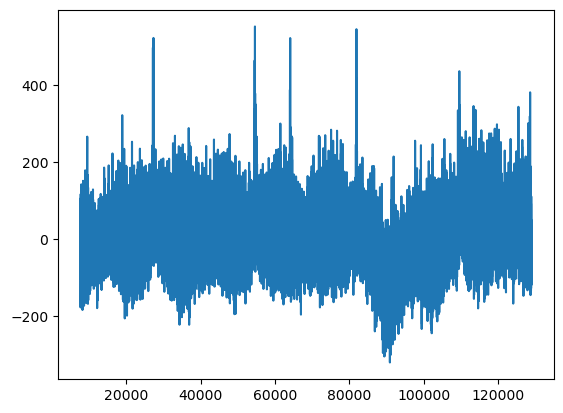

In [62]:
# seasonal = decomposition.seasonal
# trend = decomposition.trend
# residual = decomposition.resid
decomp = [seasonal, trend, residual]
for i in decomp:
    i.plot()
    plt.show()

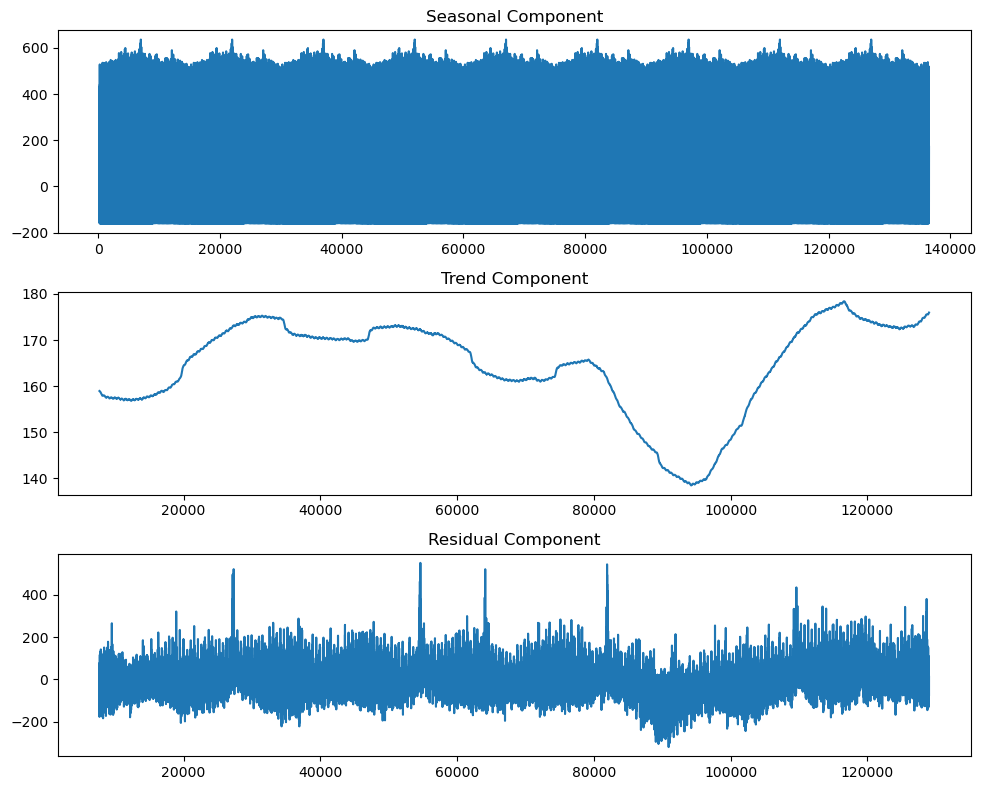

In [63]:
import matplotlib.pyplot as plt

# Plot the decomposed components
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Plot the seasonal component
axes[0].plot(seasonal)
axes[0].set_title('Seasonal Component')

# Plot the trend component
axes[1].plot(trend)
axes[1].set_title('Trend Component')

# Plot the residual component
axes[2].plot(residual)
axes[2].set_title('Residual Component')

plt.tight_layout()
plt.show()


In [64]:
# Identify outliers in the seasonal component based on z-score threshold
z_threshold = 1.72  # Set the z-score threshold for outlier detection
z_scores = (seasonal - seasonal.mean()) / seasonal.std()  # Calculate z-scores
seasonal_outliers = np.abs(z_scores) > z_threshold  # Identify outliers

In [65]:
outlier_indices = seasonal[seasonal_outliers].index
train_cleaned = dummy_train.drop(outlier_indices)

In [66]:
outlier_indices

Int64Index([   205,    206,    208,    250,    251,    253,    254,    280,
               281,    283,
            ...
            136405, 136406, 136408, 136450, 136451, 136453, 136454, 136480,
            136481, 136483],
           dtype='int64', length=13352)

In [67]:
reconstructed = trend + residual

<Axes: >

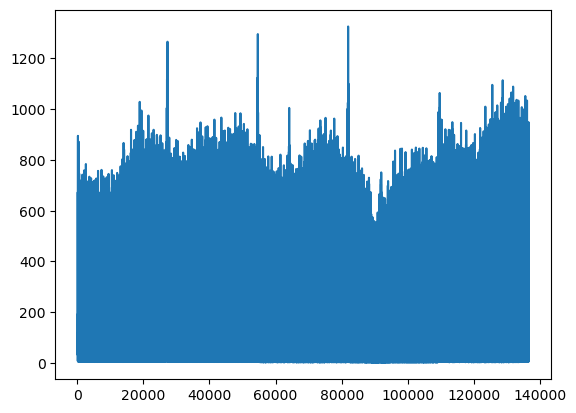

In [68]:
train['num_sold'].plot()

<Axes: >

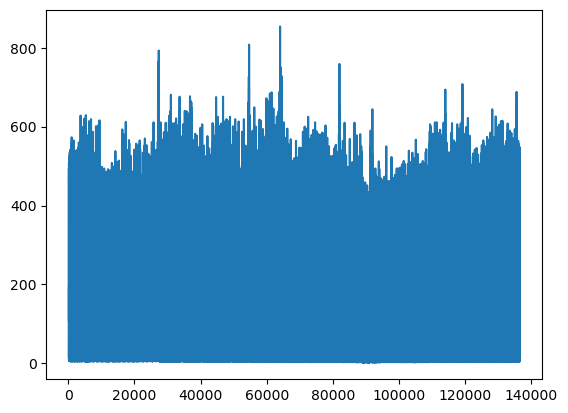

In [69]:
train_cleaned['num_sold'].plot()

### No scaling nessecary, since all features are binary (except for date)

## Splitting the data into train and test sets

In [70]:
X = train_cleaned.drop('num_sold', axis=1)
y = train_cleaned['num_sold']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Model 1: OLS

In [72]:
# Add a constant term to the features
X_train_OLS = sm.add_constant(X_train)
X_test_OLS = sm.add_constant(X_test)

# Fit the OLS model
model = sm.OLS(y_train, X_train_OLS).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                 2.565e+04
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:27:29   Log-Likelihood:            -5.3746e+05
No. Observations:               98358   AIC:                         1.075e+06
Df Residuals:                   98346   BIC:                         1.075e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     78.7190      0.227    347.043      0.000      78.274      79.164
country_Argentina                                        -60.2810      0.355   -169.760      0.000     -60.977     -59.585
country_Canada                                            49.6966      0.408    121.905      0.000      48.898      50.496
country_Estonia                                            8.6735      0.355     24.432      0.000       7.978       9.369
country_Japan                                             43.4983      0.392    110.903      0.000      42.730      44.267
country_Spain                                             37.1314      0.356    104.344      0.000      36.434      37.829
store_Kagglazon                                          147.6238      0.303    487.148      0.000     147.030     148.218
store_Kaggle Learn                                       -50.7708      0.262   -193.452      0.000     -51.285     -50.256
store_Kaggle Store                                       -18.1341      0.263    -68.976      0.000     -18.649     -17.619
product_Using LLMs to Improve Your Coding                 54.6578      0.374    146.070      0.000      53.924      55.391
product_Using LLMs to Train More LLMs                     53.5119      0.375    142.688      0.000      52.777      54.247
product_Using LLMs to Win Friends and Influence People   -87.6571      0.355   -246.851      0.000     -88.353     -86.961
product_Using LLMs to Win More Kaggle Competitions        30.2808      0.373     81.118      0.000      29.549      31.012
product_Using LLMs to Write Better                        27.9256      0.366     76.403      0.000      27.209      28.642
month                                                      0.1185      0.053      2.237      0.025       0.015       0.222
==============================================================================
Omnibus:                    23936.366   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81967.260
Skew:                           1.215   Prob(JB):                         0.00
Kurtosis:                       6.755   Cond. No.                     5.22e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.01e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
y_pred = model.predict(X_test_OLS)

In [75]:
# Calculate SMAPE
def smape(actual, predicted):
    """
    Calculates Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    return np.mean((np.abs(actual - predicted) * 200) / (np.abs(actual) + np.abs(predicted)))

smape_score = smape(y_test, y_pred)
print('SMAPE:', smape_score)

SMAPE: 52.91448403039891


## Model 2: Random Forrest

In [76]:
# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

smape_score = smape(y_test, y_pred)
print('SMAPE:', smape_score)

SMAPE: 12.43786921284887


In [77]:
rf_model = RandomForestRegressor(n_estimators=170, random_state=42)

In [78]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=170, random_state=42)

In [79]:
# Get the depths of the decision trees
tree_depths = [estimator.tree_.max_depth for estimator in rf_model.estimators_]

# Print the depths
for i, depth in enumerate(tree_depths):
    print(f"Tree {i+1} Depth: {depth}")

Tree 1 Depth: 17
Tree 2 Depth: 18
Tree 3 Depth: 18
Tree 4 Depth: 17
Tree 5 Depth: 17
Tree 6 Depth: 18
Tree 7 Depth: 17
Tree 8 Depth: 18
Tree 9 Depth: 17
Tree 10 Depth: 17
Tree 11 Depth: 18
Tree 12 Depth: 17
Tree 13 Depth: 17
Tree 14 Depth: 17
Tree 15 Depth: 17
Tree 16 Depth: 17
Tree 17 Depth: 17
Tree 18 Depth: 17
Tree 19 Depth: 17
Tree 20 Depth: 18
Tree 21 Depth: 17
Tree 22 Depth: 17
Tree 23 Depth: 18
Tree 24 Depth: 18
Tree 25 Depth: 16
Tree 26 Depth: 17
Tree 27 Depth: 18
Tree 28 Depth: 17
Tree 29 Depth: 17
Tree 30 Depth: 18
Tree 31 Depth: 18
Tree 32 Depth: 17
Tree 33 Depth: 18
Tree 34 Depth: 17
Tree 35 Depth: 18
Tree 36 Depth: 18
Tree 37 Depth: 17
Tree 38 Depth: 17
Tree 39 Depth: 17
Tree 40 Depth: 18
Tree 41 Depth: 18
Tree 42 Depth: 17
Tree 43 Depth: 17
Tree 44 Depth: 17
Tree 45 Depth: 17
Tree 46 Depth: 18
Tree 47 Depth: 17
Tree 48 Depth: 17
Tree 49 Depth: 17
Tree 50 Depth: 18
Tree 51 Depth: 17
Tree 52 Depth: 18
Tree 53 Depth: 17
Tree 54 Depth: 17
Tree 55 Depth: 18
Tree 56 Depth: 18
T

In [80]:
# import time

# smapes = []

# for i in range(2, 200, 2):
#     rf_model = RandomForestRegressor(n_estimators=170, max_depth=i, random_state=42)
    
#     start_time = time.time()  # Record the start time
    
#     # Fit the model on the training data
#     rf_model.fit(X_train, y_train)

#     # Predict on the test data
#     y_pred = rf_model.predict(X_test)

#     end_time = time.time()  # Record the end time
#     elapsed_time = end_time - start_time  # Calculate the elapsed time
    
#     smape_score = smape(y_test, y_pred)
#     smapes.append(smape_score)
    
#     print(f"Iteration {i}: Elapsed Time: {elapsed_time:.2f} seconds, SMAPE Score: {smape_score:.4f}")


In [81]:
# import optuna
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     # Define the hyperparameters to optimize
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 3000, step=100),
#         'max_depth': trial.suggest_int('max_depth', 2, 18),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#     }
    
#     # Create the Random Forest model
#     model = RandomForestRegressor(random_state=42, **params)
    
#     # Use cross-validation to evaluate the model performance
#     scores = cross_val_score(model, X_train, y_train, cv=3, scoring=make_scorer(smape))
    
#     # Optimize for the average SMAPE score
#     smape_avg = scores.mean()
#     return smape_avg

# # Create an Optuna study and optimize the objective function
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # Get the best parameters and best SMAPE score
# best_params = study.best_params
# best_score = study.best_value

# print(f"Best Parameters: {best_params}")
# print(f"Best SMAPE Score: {best_score}")


In [82]:
import random
from deap import base, creator, tools, algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import optuna

# Define the evaluation function for the GA
def evaluate(individual):
    # Decode the individual into hyperparameter values
    params = {
        'n_estimators': individual[0],
        'max_depth': individual[1],
        'min_samples_split': individual[2],
        'min_samples_leaf': individual[3],
        'max_features': individual[4],
    }

    # Create the Random Forest model
    model = RandomForestRegressor(random_state=42, **params)

    # Use cross-validation to evaluate the model performance
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring=make_scorer(smape))

    # Optimize for the average SMAPE score
    smape_avg = scores.mean()
    return smape_avg,

# Define the GA parameters
population_size = 256
num_generations = 8

# Define the GA toolbox
toolbox = base.Toolbox()

# Check if the classes have been previously created
if not hasattr(creator, "FitnessMin"):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox.register("attr_int", random.randint, 100, 1000)
toolbox.register("attr_range", random.randint, 2, 18)
toolbox.register("attr_categorical", random.choice, ['sqrt', 'log2'])
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int, toolbox.attr_range, toolbox.attr_range,
                  toolbox.attr_range, toolbox.attr_categorical), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the evaluation function and genetic operators
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=2, up=18, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the GA algorithm
population = toolbox.population(n=population_size)
hall_of_fame = tools.HallOfFame(maxsize=1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

ga_results, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2,
                                          ngen=num_generations, stats=stats,
                                          halloffame=hall_of_fame, verbose=True)

# Get the best individual from the GA
best_individual = hall_of_fame[0]
best_params = {
    'n_estimators': best_individual[0],
    'max_depth': best_individual[1],
    'min_samples_split': best_individual[2],
    'min_samples_leaf': best_individual[3],
    'max_features': best_individual[4],
}
best_score = evaluate(best_individual)[0]

print(f"Best Parameters: {best_params}")
print(f"Best SMAPE Score: {best_score}")

KeyboardInterrupt: 

In [107]:
smapes = []

for i in range(1, 100):
    model = RandomForestRegressor(random_state=42, **best_params)
    model.max_depth = i
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = mean_absolute_percentage_error(y_test, y_pred)
    smapes.append(score)
    print(f'Max depth: {i}\nScore: {score}')
    

Max depth: 1
Score: 1.7191232105792402
Max depth: 2
Score: 1.3080740897434329
Max depth: 3
Score: 0.9862135586254961
Max depth: 4
Score: 0.7283683274201338
Max depth: 5
Score: 0.5307729901650491
Max depth: 6
Score: 0.3786610446928781
Max depth: 7
Score: 0.26522160384148263
Max depth: 8
Score: 0.19390282198195444
Max depth: 9
Score: 0.15379655404870937
Max depth: 10
Score: 0.13544733629372874
Max depth: 11
Score: 0.13022063300845665
Max depth: 12
Score: 0.12879921538050754
Max depth: 13
Score: 0.12823961744118548
Max depth: 14
Score: 0.12813215935174133
Max depth: 15
Score: 0.12809635459158042
Max depth: 16
Score: 0.1281230691679167
Max depth: 17
Score: 0.12808897201386865
Max depth: 18
Score: 0.12814101154921517
Max depth: 19
Score: 0.12811565329641608


KeyboardInterrupt: 

### RandomForestRegressor
### RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=4,
### min_samples_split=18, n_estimators=696, random_state=42)

In [108]:

model = RandomForestRegressor(random_state=42, **best_params)
model.max_depth = 12
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=18, n_estimators=696, random_state=42)

In [109]:
test_predictions = model.predict(dummy_test)

In [110]:
test_predictions

array([ 28.70365177,  29.64763162,   4.204009  , ...,  76.27932915,
       439.31120376, 349.24030589])

In [111]:
submission7 = pd.DataFrame(test_predictions)

In [112]:
submission7.rename(columns={0:'num_sold'}, inplace=True)

In [113]:
submission7.index = test.index

In [114]:
submission7

,num_sold
id,
136950,28.703652
136951,29.647632
136952,4.204009
136953,27.267268
136954,23.632403
...,...
164320,501.468703
164321,467.082695
164322,76.279329


In [115]:
submission7.to_csv('submission11.csv')

## Model 2: Polynomial Regression

In [85]:
# Create polynomial features
degree = 4  # Adjust the degree of the polynomial as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test data
y_pred = model.predict(X_test_poly)

# Calculate SMAPE
smape_score = mean_absolute_percentage_error(y_test, y_pred)
print('SMAPE:', smape_score)


SMAPE: 0.14459823866504354


In [86]:
dummy_test_poly = poly_features.transform(dummy_test)

test_predictions = model.predict(dummy_test_poly)
submission8 = pd.DataFrame(test_predictions)
submission8.rename(columns={0:'num_sold'}, inplace=True)
submission8.index = test.index
submission8

,num_sold
id,
136950,43.913965
136951,32.727318
136952,9.736355
136953,24.988792
136954,11.829390
...,...
164320,521.534046
164321,469.540882
164322,80.167347


In [87]:
submission8.to_csv('submission9.csv')